In [1]:
using Gadfly
using Ensemble
using TestModel

 in depwarn at ./deprecated.jl:62
 in oldstyle_vcat_warning at ./abstractarray.jl:28
 in vect at abstractarray.jl:31
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:52
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/farr/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/farr/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
whi

In [46]:
ns = TestModel.draw_noise(TestModel.mu_noise, TestModel.sigma_noise, 250)

250-element Array{Float64,1}:
 0.857866
 1.13139 
 0.968747
 1.06721 
 1.25574 
 0.953073
 0.959526
 0.920857
 1.29534 
 1.05114 
 1.01797 
 0.875982
 1.10589 
 ⋮       
 0.899286
 0.481288
 0.901448
 0.843897
 0.999096
 0.780809
 1.40787 
 0.901488
 1.06699 
 0.866603
 0.866327
 1.21777 

In [47]:
xsdet, xsndet = TestModel.draw(TestModel.lambda0, TestModel.mu0, TestModel.sigma0, TestModel.snr_half0, TestModel.snr_width0, ns)

(Any[[6.865045420569398,7.711200037950052,9.69236028386245,9.170585032000849,9.56873903497371,8.537762043080235,10.119279468771621,9.972151806984717],[4.786396413350643,7.863425187865919,7.865006924669374],[9.149563052494234,10.396003063923889,5.766107503133956,5.144898223141636,8.800138731026598],[7.424382701718618,8.988831235762632,9.689421588077913],[9.00806331749319,6.366634481624105,10.83804691949638],[6.820022306824257,7.3072246176173605,9.169439558716102,13.20921911466168,11.691032298650581],[8.719066571033846,5.842153654461238,7.653044990605501,11.289406178009056,8.165269044784257,7.0406937007885375,8.442673759248356,9.762595490105426,15.665776858318765],[8.616734820058035,8.893951628087231,8.541297080621769,14.199337724235644,6.530794758146318,8.886005265670255,12.597700394320182],[9.643164262039189,12.343674736925083,6.551620523501227],[8.683808084512702,10.288547175325867,5.904543494074133]  …  [8.60330861818565,7.607399883769588,9.926558588059489,6.8594337964590295,8.680702

In [48]:
ndet = sum([length(x) for x in xsdet])
nndet = sum([length(x) for x in xsndet])
println(ndet)
println(nndet)

1273
1218


In [49]:
all_xsdet = Array{Float64, 1}(vcat(xsdet...))
all_xsndet = Array{Float64, 1}(vcat(xsndet...))

1218-element Array{Float64,1}:
 3.99689
 6.31717
 6.61621
 4.59996
 6.48264
 5.9783 
 5.13132
 5.92462
 5.17963
 6.44813
 6.95946
 4.88523
 3.61277
 ⋮      
 5.23567
 6.08262
 5.70741
 7.06163
 5.49806
 4.96582
 5.83254
 8.22994
 5.20085
 4.87391
 6.19931
 7.05835

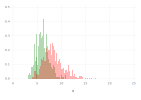

In [50]:
plot(layer(x=all_xsdet, Geom.histogram(density=true), Theme(default_color=Color.AlphaColorValue(color("red"), 0.3))),
layer(x=all_xsndet, Geom.histogram(density=true), Theme(default_color=Color.AlphaColorValue(color("green"), 0.3))))

In [51]:
lnprob = TestModel.make_lnprob(xsdet, ns)

lnprob (generic function with 1 method)

In [52]:
gibbsupdate = TestModel.make_gibbsupdate(ns)

gibbsupdate (generic function with 1 method)

In [53]:
ps = zeros(5, 100)
for i in 1:100
    ps[:,i] = TestModel.p0 + 1e-3*randn(5)
end
gs = zeros(100)
gs = EnsembleGibbs.gibbses(ps, gs, gibbsupdate)
lnprobs = EnsembleGibbs.lnprobs(ps, gs, lnprob)

100-element Array{Float64,1}:
 -2970.69
 -3022.63
 -3021.79
 -3013.16
 -3016.71
 -3006.68
 -3023.15
 -2968.65
 -3026.54
 -3020.27
 -2945.23
 -3002.6 
 -3029.16
     ⋮   
 -3045.01
 -3030.99
 -2991.35
 -3029.96
 -3020.69
 -3074.69
 -3008.79
 -2996.87
 -2990.13
 -2996.95
 -3026.17
 -2995.52

In [54]:
for i in 1:1000
    ps, gs, lnprobs = EnsembleGibbs.update(ps, gs, lnprobs, lnprob, gibbsupdate) 
end

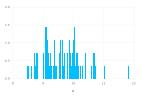

In [55]:
plot(x=exp(ps[1,:]), Geom.histogram(density=true))

In [56]:
chain, gibbs, lnps = EnsembleGibbs.run_mcmc(ps, gs, lnprobs, lnprob, gibbsupdate, 1000; thin=10)

(
5x100x100 Array{Float64,3}:
[:, :, 1] =
  2.30101    2.36755    2.31384    2.15977  …   2.31756   2.24725    2.29695 
  1.91091    1.931      1.90555    1.93971      1.9331    1.92112    1.9382  
 -1.21976   -1.23877   -1.23511   -1.2566      -1.30437  -1.21668   -1.23289 
  1.93307    1.97486    1.93775    1.92223      1.95848   1.92786    1.95777 
 -0.171423  -0.156962  -0.199815  -0.11898     -0.12626  -0.234318  -0.191951

[:, :, 2] =
  2.31166   2.40182    2.3427    …   2.31212    2.21161    2.27882 
  1.89882   1.9292     1.8973        1.9262     1.9309     1.94029 
 -1.21033  -1.25063   -1.2298       -1.29777   -1.26132   -1.23951 
  1.92732   1.99304    1.94321       1.95541    1.92874    1.9498  
 -0.24115  -0.134493  -0.176325     -0.147277  -0.268937  -0.156527

[:, :, 3] =
  2.30565    2.43041    2.32796   …   2.30846    2.20976    2.26604 
  1.90476    1.92646    1.90733       1.92671    1.93361    1.94518 
 -1.20657   -1.25331   -1.23623      -1.29527   -1.26332   -1.23

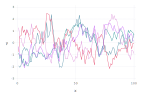

In [57]:
mus = zeros(5, 100)
for k in 1:100
    for i in 1:5
        mus[i,k] = mean(chain[i,:,k])
    end
end
layers = map(1:5) do i
    mu = mean(mus[i,:])
    sigma = std(mus[i,:])
    layer(x=collect(1:100), y=(mus[i,:] - mu)/sigma, Geom.line, Theme(default_color=Color.RGB(rand(3)...)))
end
plot(layers...)

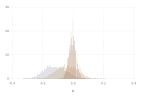

In [58]:
layers = map(1:5) do i
    layer(x=chain[i,:,:]-TestModel.p0[i], Geom.histogram(density=true), Theme(default_color=Color.AlphaColorValue(Color.RGB(rand(3)...), 0.15)))
end
plot(layers...)

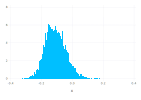

In [63]:
plot(x=exp(chain[5,:,:])-TestModel.snr_width0, Geom.histogram(density=true))